In [1]:
import polars as pl
import matplotlib.pyplot as plt

# sorted(lf.collect_schema())
df = (
    pl.scan_parquet('s3://aind-scratch-data/dynamic-routing/cache/nwb_components/v0.0.261/units/742903_2024-10-22.parquet')
    .select('decoder_label', 'decoder_probability', 'spike_amplitudes' ,'spike_times', 'presence_ratio')
    .collect()
)

C:\Users\ben.hardcastle\AppData\Local\Temp\ipykernel_21264\146721045.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


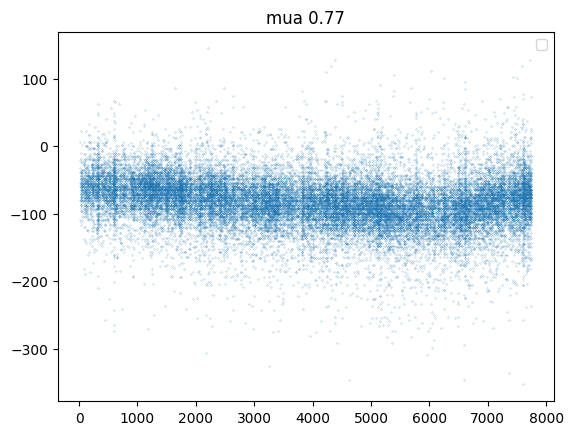

In [49]:
for row in (
    df
    .filter(
        pl.col('decoder_label') == 'mua',
        pl.col('presence_ratio') > 0.7,
    )
    .sample(1)
).iter_rows(named=True):
    plt.figure()
    plt.plot(row['spike_times'], row['spike_amplitudes'], '.', ms=.3)
    plt.title(f"{row['decoder_label']} {row['decoder_probability']}")
    plt.legend()